## Kosarak

EOF
Execution time: 212.853 seconds.
Top-1024 in CMS-8*2688
Precision:  0.787
Top_dict with 36968 bytes.
CMS Sketch with 86128 bytes.
Total size 123096 bytes, 
Find:806
Top_ARE: 3.1595
Top_AAE: 234.3337
Estimate time:  1.166 seconds.


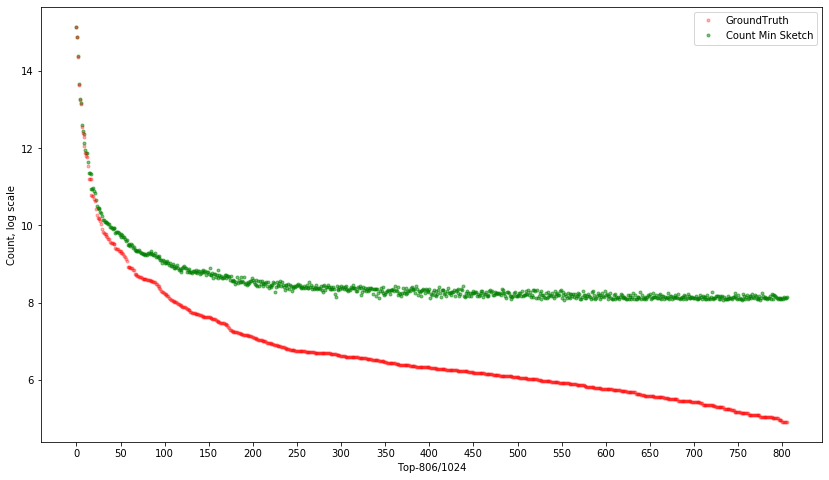

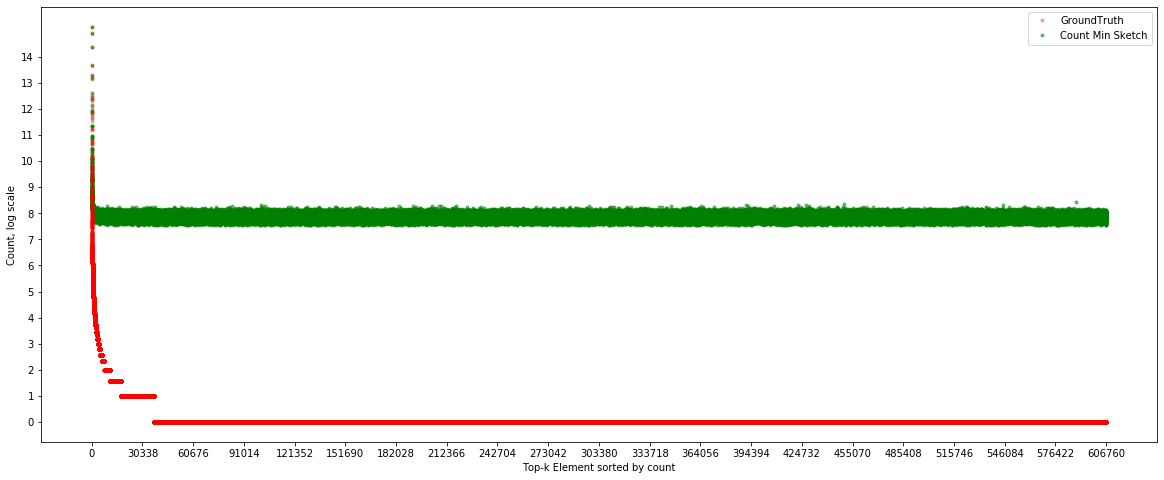

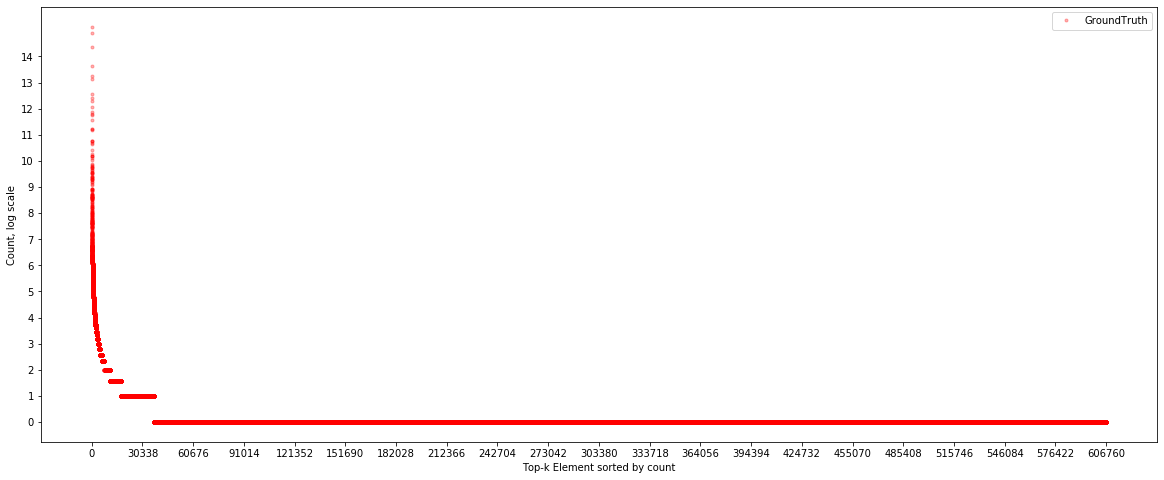

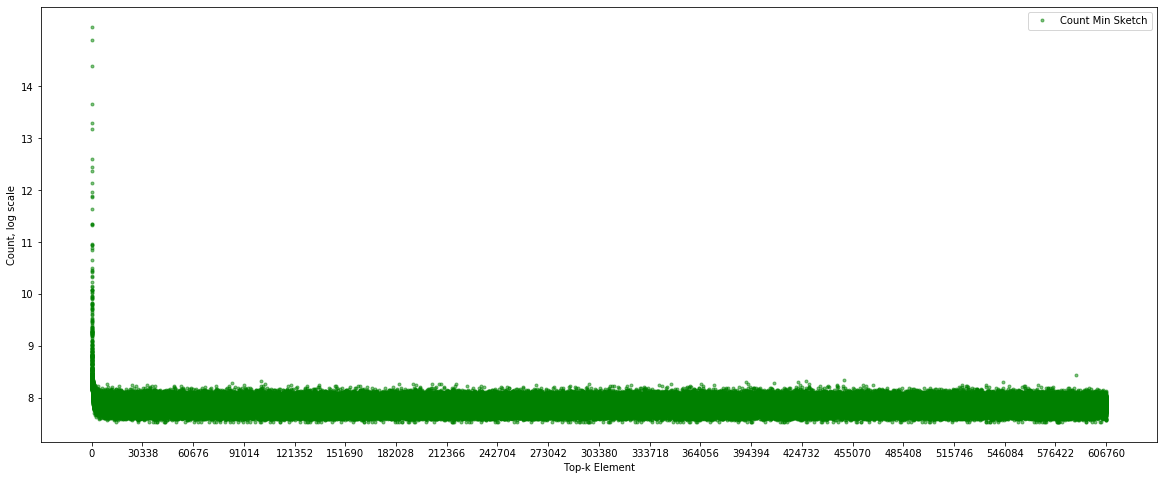

In [1]:
# kosarak
# track Top-k element all the time
import sys
sys.path.append("..")
from cms.CountMinSketch import CountMinSketch
import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS

import time
import os

import tracemalloc

tracemalloc.start()
    # start track memory usage===========================================================

filename='kosarak.dat'
filepath=r"..\..\dataset\kosarak"
gr_file_name='kosarak_ground_truth.csv'
src_data=os.path.join(filepath,filename)
    # dataset
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth

w=2688
d=8
size=1024
topk=1024
TC.Set_default(w,d,size,topk)
cms=CountMinSketch(TC.width,TC.depth)
Top_dict=dict()

#item_count=10000
start=time.time()
with open(src_data,'r') as file:
    while True:
        e=file.readline().strip('\n')
        if not e:
            print('EOF')
            break
        else:
            #item_count-=1
            item=DS.Tail(e,1)
            cms.Add_CMS(item)
            count=cms.Estimate_CMS(item)
            if len(Top_dict)<TC.size:
                Top_dict[item.ID]=count
            else:
                if Top_dict.get(item.ID):
                    # e in Top
                    Top_dict[item.ID]=count
                else:
                    min_ele = min(Top_dict, key=Top_dict.get)
                        # find e_min
                    if count >Top_dict[min_ele]:
                        Top_dict[item.ID]=count
                        Top_dict.pop(min_ele)

end=time.time()

snapshot = tracemalloc.take_snapshot()
top_stats = snapshot.statistics('lineno')
    # stop track memory usage===========================================================
    
    
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
print("Execution time:{:8.3f} seconds.".format(end-start))

# Element-Precision
tp_set,precision=TF.Get_precision(gr_path,Top_dict,TC.topk)
print("Top-{} in CMS-{}*{}".format(TC.topk,TC.depth,TC.width))
print("Precision: {:6.3f}".format(precision))

# Count-Precision


# memory usage
print("Top_dict with {} bytes.".format(sys.getsizeof(Top_dict)))
print("CMS Sketch with {} bytes.".format(sys.getsizeof(cms.sketch)))
print("Total size {} bytes, ".format(sys.getsizeof(Top_dict)+sys.getsizeof(cms.sketch)))

# Count ARE/AAE
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,Top_dict,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 

TF.Plot_topk_compare(gr_path,Top_dict,"Count Min Sketch")

# All element compare
ground_truth=TF.Get_ground_truth(gr_path)
My_result=dict()
for item in ground_truth:
    # item:ID of e
    My_result[item]=cms.Estimate_CMS(DS.Tail(item,1))
TF.Plot_all_compare(ground_truth,My_result,"Count Min Sketch")

## Caida

In [ ]:
# caida
# track Top-k element all the time
import sys
sys.path.append("..")
from cms.CountMinSketch import CountMinSketch
import sys
import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import re

import time
import os

filepath=r"..\..\dataset\caida"
pattern='\w+.dat$'
r=re.compile(pattern)
filelist=list(filter(r.match,os.listdir(filepath)))    
    # dataset file list

gr_file_name='caida_0_ground_truth.csv'
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth path

w=2688
d=8
size=1024
topk=1024
TC.Set_default(w,d,size,topk)
cms=CountMinSketch(TC.width,TC.depth)
Top_dict=dict()

#item_count=10000
start=time.time()
for datafile in filelist[:1]:
    src_data=os.path.join(filepath,datafile)
    with open(src_data,'rb') as file:
         #以binary讀取，資料型態也為byte
        while True:
            e=str(file.read(13))
            if len(e)<13:
                print('EOF')
                break
            else:    
                #item_count-=1
                item=DS.Tail(e,1)
                cms.Add_CMS(item)
                count=cms.Estimate_CMS(item)
                if len(Top_dict)<TC.size:
                    Top_dict[item.ID]=count
                else:
                    if Top_dict.get(item.ID):
                        # e in Top
                        Top_dict[item.ID]=count
                    else:
                        min_ele = min(Top_dict, key=Top_dict.get)
                            # find e_min
                        if count >Top_dict[min_ele]:
                            Top_dict[item.ID]=count
                            Top_dict.pop(min_ele)

end=time.time()
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
print("Execution time:{:8.3f} seconds.".format(end-start))

# Element-Precision
tp_set,precision=TF.Get_precision(gr_path,Top_dict,TC.topk)
print("Top-{} in CMS-{}*{}".format(TC.topk,TC.depth,TC.width))
print("Precision: {:6.3f}".format(precision))

# Count-Precision


# memory usage
print("Top_dict with {} bytes.".format(sys.getsizeof(Top_dict)))
print("CMS Sketch with {} bytes.".format(sys.getsizeof(cms.sketch)))
print("Total size {} bytes, ".format(sys.getsizeof(Top_dict)+sys.getsizeof(cms.sketch)))

# Count ARE/AAE
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,Top_dict,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 

TF.Plot_topk_compare(gr_path,Top_dict,"Count Min Sketch")

# All element compare
ground_truth=TF.Get_ground_truth(gr_path)
My_result=dict()
for item in ground_truth:
    # item:ID of e
    My_result[item]=cms.Estimate_CMS(DS.Tail(item,1))
TF.Plot_all_compare(ground_truth,My_result,"Count Min Sketch")

## webdocs

In [ ]:
# caida
# track Top-k element all the time
import sys
sys.path.append("..")
from cms.CountMinSketch import CountMinSketch
import sys
import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import re

import time
import os

filepath=r"..\..\dataset\webdocs"
pattern='out_.*'
r=re.compile(pattern)
filelist=list(filter(r.match,os.listdir(filepath)))    
    # dataset file list

gr_file_name='webdocs_00_ground_truth.csv'        
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth path

w=2688
d=8
size=1024
topk=1024
TC.Set_default(w,d,size,topk)
cms=CountMinSketch(TC.width,TC.depth)
Top_dict=dict()

#item_count=10000
start=time.time()
for datafile in filelist[:1]:
    src_data=os.path.join(filepath,datafile)
    with open(src_data,'r') as file:
        while True:
            e=file.readline().strip('\n')
            if not e:
                print("EOF")
                break
            else:    
                #item_count-=1
                item=DS.Tail(e,1)
                cms.Add_CMS(item)
                count=cms.Estimate_CMS(item)
                if len(Top_dict)<TC.size:
                    Top_dict[item.ID]=count
                else:
                    if Top_dict.get(item.ID):
                        # e in Top
                        Top_dict[item.ID]=count
                    else:
                        min_ele = min(Top_dict, key=Top_dict.get)
                            # find e_min
                        if count >Top_dict[min_ele]:
                            Top_dict[item.ID]=count
                            Top_dict.pop(min_ele)

end=time.time()
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
print("Execution time:{:8.3f} seconds.".format(end-start))

# Element-Precision
tp_set,precision=TF.Get_precision(gr_path,Top_dict,TC.topk)
print("Top-{} in CMS-{}*{}".format(TC.topk,TC.depth,TC.width))
print("Precision: {:6.3f}".format(precision))

# Count-Precision


# memory usage
print("Top_dict with {} bytes.".format(sys.getsizeof(Top_dict)))
print("CMS Sketch with {} bytes.".format(sys.getsizeof(cms.sketch)))
print("Total size {} bytes, ".format(sys.getsizeof(Top_dict)+sys.getsizeof(cms.sketch)))

# Count ARE/AAE
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,Top_dict,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 

TF.Plot_topk_compare(gr_path,Top_dict,"Count Min Sketch")

# All element compare
ground_truth=TF.Get_ground_truth(gr_path)
My_result=dict()
for item in ground_truth:
    # item:ID of e
    My_result[item]=cms.Estimate_CMS(DS.Tail(item,1))
TF.Plot_all_compare(ground_truth,My_result,"Count Min Sketch")

In [ ]:
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
print("Execution time:{:8.3f} seconds.".format(end-start))

# Element-Precision
tp_set,precision=TF.Get_precision(gr_path,Top_dict,TC.topk)
print("Top-{} in CMS-{}*{}".format(TC.topk,TC.depth,TC.width))
print("Precision: {:6.3f}".format(precision))

# Count-Precision


# memory usage
print("Top_dict with {} bytes.".format(sys.getsizeof(Top_dict)))
print("CMS Sketch with {} bytes.".format(sys.getsizeof(cms.sketch)))
print("Total size {} bytes, ".format(sys.getsizeof(Top_dict)+sys.getsizeof(cms.sketch)))

# Count ARE/AAE
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,Top_dict,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 

TF.Plot_topk_compare(gr_path,Top_dict,"Count Min Sketch")

# All element compare
ground_truth=TF.Get_ground_truth(gr_path)
My_result=dict()
for item in ground_truth:
    # item:ID of e
    My_result[item]=cms.Estimate_CMS(DS.Tail(item,1))
TF.Plot_all_compare(ground_truth,My_result,"Count Min Sketch")